# Iris Dataset Example for Perceptron
This notebook demonstrates the perceptron algorithm using a subset of the classic Iris dataset. We focus on two classes (Setosa and Versicolor) and two features (sepal length and sepal width) to illustrate linear classification. The perceptron is a foundational algorithm in machine learning, showing how simple mathematical rules can separate data into classes.

## 1. Data Visualization
We load the Iris data and visualize the two classes in a 2D feature space. This helps us see if the data is linearly separable, which is a requirement for the perceptron to work perfectly.

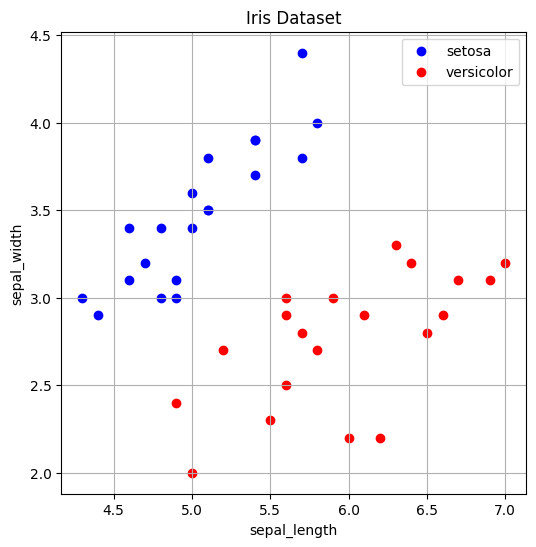

In [27]:
# Load and visualize the data
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('perceptron_data.csv')
plt.figure(figsize=(6,6))
for label, color, name in zip([0, 1], ['blue', 'red'], ['setosa', 'versicolor']):
    subset = data[data['label'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=name, color=color)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

## 2. Perceptron Model
We define a simple Perceptron class that can be trained to classify the two Iris species using their sepal length and width. The perceptron learns a linear decision boundary by updating its weights based on classification errors. The following code implements the perceptron model and its training procedure.



In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, lr=0.1, n_iter=1000, activation='step'):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.activation = activation

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iter):
            linear_output = np.dot(X, self.weights) + self.bias
            y_pred = self._activation(linear_output)
            # For step activation, treat as perceptron update; for sigmoid/relu, use gradient
            if self.activation == 'step':
                for idx, x_i in enumerate(X):
                    update = self.lr * (y[idx] - y_pred[idx])
                    self.weights += update * x_i
                    self.bias += update
            else:
                # Gradient descent for differentiable activations
                if self.activation == 'sigmoid':
                    # sigmoid derivative: s * (1 - s)
                    s = 1 / (1 + np.exp(-linear_output))
                    error = y - s
                    grad = s * (1 - s)
                    self.weights += self.lr * np.dot((error * grad), X)
                    self.bias += self.lr * np.sum(error * grad)
                elif self.activation == 'relu':
                    # relu derivative: 1 if x > 0 else 0
                    grad = (linear_output > 0).astype(float)
                    error = y - y_pred
                    self.weights += self.lr * np.dot((error * grad), X)
                    self.bias += self.lr * np.sum(error * grad)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation(linear_output)

    def _activation(self, x):
        if self.activation == 'step':
            return np.where(x >= 0, 1, 0)
        elif self.activation == 'sigmoid':
            return (1 / (1 + np.exp(-x))) >= 0.5
        elif self.activation == 'relu':
            return np.where(x > 0, 1, 0)
        else:
            raise ValueError("Unsupported activation function. Choose 'step', 'sigmoid', or 'relu'.")
    


## 3. Perceptron Implementation
We implement the perceptron as a Python class with methods for training (`fit`) and prediction (`predict`). The perceptron updates its weights and bias iteratively to minimize classification errors. The activation function can be chosen as step, sigmoid, or ReLU, allowing us to explore different behaviors. The model is trained on the two selected features (`sepal_length` and `sepal_width`) to distinguish between Setosa and Versicolor.

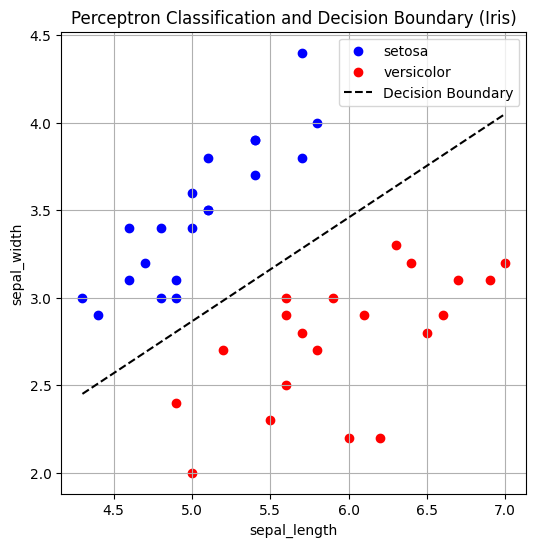

In [34]:
# Prepare data
X = data[['sepal_length', 'sepal_width']].values
y = data['label'].values

# Train perceptron
perceptron = Perceptron(lr=0.1, n_iter=500, activation='sigmoid')
perceptron.fit(X, y)

# Visualize decision boundary
plt.figure(figsize=(6,6))
for label, color, name in zip([0, 1], ['blue', 'red'], ['setosa', 'versicolor']):
    subset = data[data['label'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=name, color=color)

# Decision boundary: w1*x1 + w2*x2 + b = 0 => x2 = -(w1/w2)x1 - b/w2
x1_vals = np.linspace(data['sepal_length'].min(), data['sepal_length'].max(), 100)
x2_vals = -(perceptron.weights[0]/perceptron.weights[1])*x1_vals - perceptron.bias/perceptron.weights[1]
plt.plot(x1_vals, x2_vals, 'k--', label='Decision Boundary')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Perceptron Classification and Decision Boundary (Iris)')
plt.legend()
plt.grid(True)
plt.show()

## 4. Training and Decision Boundary
We train the perceptron on the Iris data and visualize the decision boundary. The decision boundary is the line where the perceptron output switches from one class to the other.

- The decision boundary is defined by $w_1 x_1 + w_2 x_2 + b = 0$
- Rearranged: $x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}$
- The perceptron updates weights to minimize misclassifications.

**Note:**  
- If the activation function is **step**, the decision boundary is a hard threshold: points on one side are classified as one class, and points on the other side as the other class.
- If the activation is **sigmoid**, the perceptron outputs probabilities, and the decision boundary is where the probability is 0.5 (still $w_1 x_1 + w_2 x_2 + b = 0$).
- For **ReLU**, the boundary is where the linear combination just crosses zero, but the output is not probabilistic.

The shape of the decision boundary remains a straight line, but the interpretation of the output changes depending on the activation function.

In [35]:
# Predict a new sample
sample = np.array([[4.0, 4.0]])
pred = perceptron.predict(sample)
print(f"Predicted class for point (4.0, 4.0): {pred[0]}")

Predicted class for point (4.0, 4.0): False
